### Using a Tagger

In [1]:
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
text = nltk.word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

CC - Coordinative Conjuction<br>
RB - adverbs<br>
IN - Preposition<br>
NN - Noun<br>
VBP - Present tense Verb<br>
JJ - Adjective<br>
NLTK provides documentation for each tag, which can be queried using
the tag, e.g., nltk.help.upenn_tagset('RB'), or a regular expression,
e.g., nltk.help.upenn_brown_tagset('NN.*'). Some corpora have README
files with tagset documentation; see nltk.name.readme(), substituting
in the name of the corpus.

In [3]:
print(nltk.help.upenn_tagset("NN"))

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
None


In [4]:
text = nltk.word_tokenize('They refuse to permit us to refuse the refuse permit')
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('refuse', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

refUSE is a verb meaning “deny,” while REFuse is a noun meaning “trash”
(i.e., they are not homophones). Thus, we need to know which word is being used in
order to pronounce the text correctly. (For this reason, text-to-speech systems usually
perform POS tagging.)

The text.similar() method takes a word w, finds all contexts w1w w2,
then finds all words w' that appear in the same context, i.e. w1w'w2.

In [5]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


### Tagged Corpora

##### Representing Tagged Tokens

Usually a tuple consisting of a token and its tag

In [6]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

Can do this for a string to. Tokenize and iterate. Make a list comprehesion

##### Reading Tagged Corpora
Whenever a corpus contains tagged text, the NLTK corpus interface will have a
tagged_words() method

In [7]:
nltk.corpus.brown.tagged_words() #Taggs with Upper case letters is a standard.

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [8]:
nltk.corpus.cess_cat.tagged_words()

[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]

In [9]:
nltk.corpus.brown.readme()

'BROWN CORPUS\n\nA Standard Corpus of Present-Day Edited American\nEnglish, for use with Digital Computers.\n\nby W. N. Francis and H. Kucera (1964)\nDepartment of Linguistics, Brown University\nProvidence, Rhode Island, USA\n\nRevised 1971, Revised and Amplified 1979\n\nhttp://www.hit.uib.no/icame/brown/bcm.html\n\nDistributed with the permission of the copyright holder,\nredistribution permitted.\n'

In [10]:
nltk.corpus.indian.tagged_words()

[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]

If the corpus is also segmented into sentences, it will have a tagged_sents() method
that divides up the tagged words into sentences rather than presenting them as one big
list. This will be useful when we come to developing automatic taggers, as they are
trained and tested on lists of sentences, not words.

In [11]:
nltk.corpus.brown.tagged_sents()

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

Tagged corpora use many different conventions for tagging words

ADJ adjective new, good, high, special, big, local<br>
ADV adverb really, already, still, early, now<br>
CNJ conjunction and, or, but, if, while, although<br>
DET determiner the, a, some, most, every, no<br>
EX  existential there, there’s<br>
FW  foreign word dolce, ersatz, esprit, quo, maitre<br>
MOD modal verb will, can, would, may, must, should<br>
N   noun year, home, costs, time, education<br>
NP  proper noun Alison, Africa, April, Washington<br>
NUM number twenty-four, fourth, 1991, 14:24<br>
PRO pronoun he, their, her, its, my, I, us<br>
P   preposition on, of, at, with, by, into, under<br>
TO  the word to to<br>
UH  interjection ah, bang, ha, whee, hmpf, oops<br>
V   verb is, has, get, do, make, see, run<br>
VD  past tense said, took, told, made, asked<br>
VG  present participle making, going, playing, working<br>
VN  past participle    given, taken, begun, sung<br>
WH  wh determiner who, which, when, what, where, how<br>
5.2

In [12]:
brown_news_tagged = nltk.corpus.brown.tagged_words(categories='news')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.keys()

dict_keys(['AT', 'NP-TL', 'NN-TL', 'JJ-TL', 'VBD', 'NR', 'NN', 'IN', 'NP$', 'JJ', '``', "''", 'CS', 'DTI', 'NNS', '.', 'RBR', ',', 'WDT', 'HVD', 'VBZ', 'CC', 'IN-TL', 'BEDZ', 'VBN', 'NP', 'BEN', 'TO', 'VB', 'RB', 'DT', 'PPS', 'DOD', 'AP', 'BER', 'HV', 'DTS', 'VBG', 'PPO', 'QL', 'JJT', 'ABX', 'NN-HL', 'VBN-HL', 'WRB', 'CD', 'MD', 'BE', 'JJR', 'VBG-TL', 'BEZ', 'NN$-TL', 'HVZ', 'ABN', 'PN', 'PPSS', 'PP$', 'DO', 'NN$', 'NNS-HL', 'WPS', '*', 'EX', 'VB-HL', ':', '(', ')', 'NNS-TL', 'NPS', 'JJS', 'RP', '--', 'BED', 'OD', 'BEG', 'AT-HL', 'VBG-HL', 'AT-TL', 'PPL', 'DOZ', 'NP-HL', 'NR$', 'DOD*', 'BEDZ*', ',-HL', 'CC-TL', 'MD*', 'NNS$', 'PPSS+BER', "'", 'PPSS+BEM', 'CD-TL', 'RBT', '(-HL', ')-HL', 'MD-HL', 'VBZ-HL', 'IN-HL', 'JJ-HL', 'PPLS', 'CD-HL', 'WPO', 'JJS-TL', 'ABL', 'BER-HL', 'PPS+HVZ', 'VBD-HL', 'RP-HL', 'MD*-HL', 'AP-HL', 'CS-HL', 'DT$', 'HVN', 'FW-IN', 'FW-DT', 'VBN-TL', 'NR-TL', 'NNS$-TL', 'FW-NN', 'HVG', 'DTX', 'OD-TL', 'BEM', 'RB-HL', 'PPSS+MD', 'NPS-HL', 'NPS$', 'WP$', 'NN-TL-HL', '

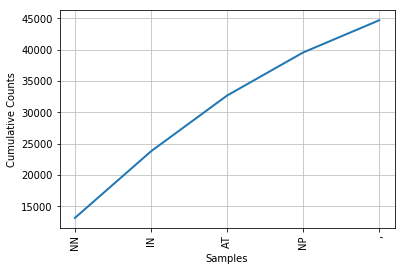

In [13]:
tag_fd.plot(5, cumulative=True)

##### Nouns
Nouns generally refer to people, places, things, or concepts, e.g., woman, Scotland,
book, intelligence. Nouns can appear after determiners and adjectives, and can be the
subject or object of the verb,

The simplified noun tags are N for common nouns like book, and NP for proper nouns
like Scotland.

In [14]:
word_biagrams=nltk.bigrams(brown_news_tagged)
list(nltk.FreqDist(a[1] for (a, b) in word_biagrams if b[1] == 'N'))

[]

##### Verbs 

Verbs are words that describe events and actions, e.g., fall and eat. In the context of a sentence, verbs typically express a relation involving the
referents of one or more noun phrases.

In [15]:
wsj = nltk.corpus.treebank.tagged_words(tagset= 'universal') #instead of simplify tags = True
word_tag_fd = nltk.FreqDist(wsj)
[word + "/" +tag for (word, tag) in word_tag_fd if tag.startswith('V')]

['will/VERB',
 'join/VERB',
 'is/VERB',
 'publishing/VERB',
 'was/VERB',
 'named/VERB',
 'used/VERB',
 'make/VERB',
 'has/VERB',
 'caused/VERB',
 'exposed/VERB',
 'reported/VERB',
 'enters/VERB',
 'causing/VERB',
 'show/VERB',
 'said/VERB',
 'makes/VERB',
 'stopped/VERB',
 'using/VERB',
 'were/VERB',
 'appear/VERB',
 'bring/VERB',
 "'re/VERB",
 'talking/VERB',
 'heard/VERB',
 'having/VERB',
 'studied/VERB',
 'have/VERB',
 'are/VERB',
 'led/VERB',
 'making/VERB',
 'replaced/VERB',
 'sold/VERB',
 'worked/VERB',
 'died/VERB',
 'expected/VERB',
 'surviving/VERB',
 'including/VERB',
 'diagnosed/VERB',
 'study/VERB',
 'appears/VERB',
 'be/VERB',
 'industrialized/VERB',
 'owned/VERB',
 'support/VERB',
 'argue/VERB',
 'should/VERB',
 'regulate/VERB',
 'found/VERB',
 'does/VERB',
 'classified/VERB',
 'according/VERB',
 'rejected/VERB',
 'explained/VERB',
 'imposed/VERB',
 'remaining/VERB',
 'outlawed/VERB',
 'made/VERB',
 'dumped/VERB',
 'imported/VERB',
 'poured/VERB',
 'mixed/VERB',
 'describ

In [16]:
wsj

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]

In [17]:
word_tag_fd

FreqDist({('Pierre', 'NOUN'): 1,
          ('Vinken', 'NOUN'): 2,
          (',', '.'): 4885,
          ('61', 'NUM'): 5,
          ('years', 'NOUN'): 115,
          ('old', 'ADJ'): 24,
          ('will', 'VERB'): 280,
          ('join', 'VERB'): 4,
          ('the', 'DET'): 4038,
          ('board', 'NOUN'): 30,
          ('as', 'ADP'): 333,
          ('a', 'DET'): 1874,
          ('nonexecutive', 'ADJ'): 5,
          ('director', 'NOUN'): 32,
          ('Nov.', 'NOUN'): 24,
          ('29', 'NUM'): 5,
          ('.', '.'): 3828,
          ('Mr.', 'NOUN'): 375,
          ('is', 'VERB'): 671,
          ('chairman', 'NOUN'): 45,
          ('of', 'ADP'): 2319,
          ('Elsevier', 'NOUN'): 1,
          ('N.V.', 'NOUN'): 3,
          ('Dutch', 'NOUN'): 1,
          ('publishing', 'VERB'): 4,
          ('group', 'NOUN'): 43,
          ('Rudolph', 'NOUN'): 3,
          ('Agnew', 'NOUN'): 1,
          ('55', 'NUM'): 10,
          ('and', 'CONJ'): 1505,
          ('former', 'ADJ'): 19,
    

Note that the items being counted in the frequency distribution are word-tag pairs.
Since words and tags are paired, we can treat the word as a condition and the tag as an
event, and initialize a conditional frequency distribution with a list of condition-event
pairs. This lets us see a frequency-ordered list of tags given a word

In [18]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].keys()

dict_keys(['NOUN', 'VERB'])

In [19]:
cfd1['cut'].keys()

dict_keys(['VERB', 'NOUN'])

In [20]:
[w for w in cfd1.conditions() if 'VBD' in cfd1[w] and 'VBN' in cfd1[w]]#VBD past tense and VBN past participle

[]

In [21]:
text = nltk.word_tokenize('show me Basketball videos on Youtube')
nltk.pos_tag(text)

[('show', 'VB'),
 ('me', 'PRP'),
 ('Basketball', 'NNP'),
 ('videos', 'NNS'),
 ('on', 'IN'),
 ('Youtube', 'NN')]

##### Unsimplified Tags

In [22]:
def findtags(tag_prefix, tagged_text):
    cfd=nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text if tag.startswith(tag_prefix))
    return dict((tag, list(cfd[tag].keys())[:5]) for tag in cfd.conditions())


In [23]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories = 'news'))
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN ['investigation', 'primary', 'election', 'evidence', 'place']
NN$ ["ordinary's", "court's", "mayor's", "wife's", "governor's"]
NN$-HL ["Golf's", "Navy's"]
NN$-TL ["Department's", "Commissioner's", "President's", "Party's", "Mayor's"]
NN-HL ['Merger', 'jail', 'Construction', 'fund', 'sp.']
NN-NC ['ova', 'eva', 'aya']
NN-TL ['County', 'Jury', 'City', 'Committee', 'Court']
NN-TL-HL ['Mayor', 'Commissioner', 'City', 'Oak', 'Grove']
NNS ['irregularities', 'presentments', 'thanks', 'reports', 'voters']
NNS$ ["taxpayers'", "children's", "members'", "women's", "years'"]
NNS$-HL ["Dealers'", "Idols'"]
NNS$-TL ["States'", "Women's", "Princes'", "Bombers'", "Falcons'"]
NNS-HL ['Wards', 'deputies', 'bonds', 'aspects', 'Decisions']
NNS-TL ['Police', 'Roads', 'Legislatures', 'Bankers', 'Reps.']
NNS-TL-HL ['Nations']


##### Exploring Tagged Corpora

Suppose we’re studying the word 'often' and want to see how it is used in text. We could
ask to see the words that follow 'often'

In [24]:
brown_learned_text = nltk.corpus.brown.words(categories = 'learned')
print(sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often')))

[',', '.', 'accomplished', 'analytically', 'appear', 'apt', 'associated', 'assuming', 'became', 'become', 'been', 'began', 'call', 'called', 'carefully', 'chose', 'classified', 'colorful', 'composed', 'contain', 'differed', 'difficult', 'encountered', 'enough', 'equate', 'extremely', 'found', 'happens', 'have', 'ignored', 'in', 'involved', 'more', 'needed', 'nightly', 'observed', 'of', 'on', 'out', 'quite', 'represent', 'responsible', 'revamped', 'seclude', 'set', 'shortened', 'sing', 'sounded', 'stated', 'still', 'sung', 'supported', 'than', 'to', 'when', 'work']


In [25]:
brown_learn_tagged = nltk.corpus.brown.tagged_words(categories = 'learned', tagset = 'universal')
tags = [b[1] for (a,b) in nltk.bigrams(brown_learn_tagged) if a[0] == 'often']
print(tags)

['ADJ', 'ADV', 'VERB', 'VERB', 'ADJ', '.', 'VERB', 'VERB', 'VERB', 'VERB', '.', 'VERB', 'ADP', 'VERB', 'VERB', 'VERB', 'VERB', 'ADP', 'ADV', 'PRT', 'VERB', 'VERB', 'ADV', 'VERB', 'VERB', 'VERB', 'VERB', 'ADP', '.', 'ADP', 'VERB', 'VERB', 'ADV', 'VERB', 'ADV', 'ADJ', 'ADP', 'ADV', 'VERB', 'ADJ', 'VERB', 'VERB', 'VERB', 'VERB', 'VERB', 'ADV', 'VERB', 'VERB', 'ADJ', 'VERB', 'ADP', 'ADP', 'ADV', 'VERB', '.', 'PRT', 'VERB', 'VERB', 'VERB', 'VERB', 'ADJ', 'VERB', 'VERB', 'VERB']


In [26]:
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


**Notice that most high frequency parts-of-speech following 'often' are words**

In [27]:
from nltk.corpus import brown
def sent_process(sent):
    for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sent):
        if t1.startswith('V') and t2=="TO" and t3.startswith('V'):
            print(w1, w2, w3)

Next, let’s look at some larger context, and find words involving particular sequences
of tags and words (in this case " 'verb' to 'verb'").

In [28]:
for tagged_sent in brown.tagged_sents()[:100]:
    sent_process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see


Finally, let’s look for words that are highly ambiguous as to their part-of-speech tag.
Understanding why such words are tagged as they are in each context can help us clarify
the distinctions between the tags.

In [29]:
brown_news_tagged = brown.tagged_words(categories = 'news', tagset = 'universal')
data = nltk.ConditionalFreqDist((word.lower(), tag) for (word, tag) in brown_news_tagged)
print(data['best'])
for word in data.conditions():
    if len(data[word]) > 3:
        tags=data[word].keys()
        print(word, " ".join(tags))

<FreqDist with 4 samples and 31 outcomes>
that ADP PRON DET ADV
best ADJ ADV VERB NOUN
present ADJ ADV NOUN VERB
close NOUN ADJ ADV VERB
open ADJ ADV VERB NOUN


In [30]:
nltk.app.concordance(brown.tagged_words(categories='news', tagset = 'universal'))

TypeError: app() takes 0 positional arguments but 1 was given

In [56]:
alice_words = nltk.corpus.gutenberg.words('carroll-alice.txt')
print(alice_words[:150])

['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'", 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ",'", 'thought', 'Alice', "'", 'without', 'pictures', 'or', 'conversation', "?'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and', 'stupid', '),', 'whether', 'the', 'pleasure', 'of', 'making', 'a', 'daisy', '-', 'chain', 'would', 'be', 'worth', 'the', 'trouble', 'of', 'getting', 'up'

In [57]:
a ={1: 'asaklda', 2:'dsksdfj'}
a.items()

dict_items([(1, 'asaklda'), (2, 'dsksdfj')])

In [58]:
fd = nltk.FreqDist(alice_words)
fd

FreqDist({'[': 3,
          'Alice': 396,
          "'": 1731,
          's': 195,
          'Adventures': 3,
          'in': 357,
          'Wonderland': 3,
          'by': 55,
          'Lewis': 1,
          'Carroll': 1,
          '1865': 1,
          ']': 1,
          'CHAPTER': 12,
          'I': 543,
          '.': 764,
          'Down': 3,
          'the': 1527,
          'Rabbit': 45,
          '-': 141,
          'Hole': 1,
          'was': 352,
          'beginning': 14,
          'to': 725,
          'get': 44,
          'very': 126,
          'tired': 7,
          'of': 500,
          'sitting': 10,
          'her': 243,
          'sister': 9,
          'on': 189,
          'bank': 3,
          ',': 1993,
          'and': 802,
          'having': 10,
          'nothing': 30,
          'do': 68,
          ':': 216,
          'once': 31,
          'or': 76,
          'twice': 5,
          'she': 509,
          'had': 177,
          'peeped': 3,
          'into': 67,
         

In [59]:
list(fd)

['[',
 'Alice',
 "'",
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 ']',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit',
 '-',
 'Hole',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'her',
 'sister',
 'on',
 'bank',
 ',',
 'and',
 'having',
 'nothing',
 'do',
 ':',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'book',
 'reading',
 'but',
 'it',
 'no',
 'pictures',
 'conversations',
 'what',
 'is',
 'use',
 'a',
 ",'",
 'thought',
 'without',
 'conversation',
 "?'",
 'So',
 'considering',
 'own',
 'mind',
 '(',
 'as',
 'well',
 'could',
 'for',
 'hot',
 'day',
 'made',
 'feel',
 'sleepy',
 'stupid',
 '),',
 'whether',
 'pleasure',
 'making',
 'daisy',
 'chain',
 'would',
 'be',
 'worth',
 'trouble',
 'getting',
 'up',
 'picking',
 'daisies',
 'when',
 'suddenly',
 'White',
 'with',
 'pink',
 'eyes',
 'ran',
 'close',
 'There',
 'so',
 'VERY',
 'remarkable',
 'that',
 ';',
 'nor',
 'did',
 'think',
 'm

In [60]:
v1000 = [word for (word,_) in fd.most_common(1000)]
mapping = nltk.defaultdict(lambda : 'UNK')

In [61]:
for v in v1000:
    mapping[v] = v; 

In [63]:
alice2 = [mapping[v] for v in alice_words]
print(alice2[:100])

['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'UNK', 'UNK', 'UNK', 'UNK', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'UNK', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'UNK', 'in', 'it', ',', "'", 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ",'", 'thought', 'Alice', "'", 'without', 'pictures', 'or', 'conversation', "?'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',']


In [64]:
fd.most_common(1000)

[(',', 1993),
 ("'", 1731),
 ('the', 1527),
 ('and', 802),
 ('.', 764),
 ('to', 725),
 ('a', 615),
 ('I', 543),
 ('it', 527),
 ('she', 509),
 ('of', 500),
 ('said', 456),
 (",'", 397),
 ('Alice', 396),
 ('in', 357),
 ('was', 352),
 ('you', 345),
 ("!'", 278),
 ('that', 275),
 ('as', 246),
 ('her', 243),
 (':', 216),
 ('t', 216),
 ('at', 202),
 ('s', 195),
 ('on', 189),
 (".'", 187),
 (';', 186),
 ('had', 177),
 ('with', 175),
 ('all', 173),
 ('!', 155),
 ("?'", 154),
 ('be', 145),
 ('-', 141),
 ('for', 140),
 ('--', 140),
 ('but', 133),
 ('not', 129),
 ('they', 129),
 ('very', 126),
 ('little', 125),
 ('so', 124),
 ('out', 116),
 ('this', 113),
 ('The', 108),
 ('he', 101),
 ('down', 99),
 ('up', 98),
 ('is', 97),
 ('about', 94),
 ('one', 94),
 ('his', 94),
 ('what', 93),
 ('them', 88),
 ('know', 87),
 ('were', 85),
 ('like', 84),
 ('went', 83),
 ('again', 83),
 ('herself', 83),
 ('if', 78),
 ('or', 76),
 ('thought', 74),
 ('Queen', 74),
 ('could', 73),
 ('have', 73),
 ('then', 72),
 ('

In [65]:
from collections import defaultdict
counts = defaultdict(int)
for (word, tag) in brown.tagged_words(categories = 'news', tagset = 'universal'):
    counts[tag] += 1
counts['NOUN']

30654

In [68]:
print(sorted(counts))

['.', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM', 'PRON', 'PRT', 'VERB', 'X']


In [69]:
from operator import itemgetter
sorted(counts.items(), key = itemgetter(1), reverse = True)


[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [73]:
#index words according to their last two letters
last_letters = defaultdict(list)
words = nltk.corpus.words.words('en')
for word in words:
    key = word[-2:]
    last_letters[key].append(word)
print(last_letters['ly'][:50])

['abactinally', 'abandonedly', 'abasedly', 'abashedly', 'abashlessly', 'abbreviately', 'abdominally', 'abhorrently', 'abidingly', 'abiogenetically', 'abiologically', 'abjectly', 'ableptically', 'ably', 'abnormally', 'abominably', 'aborally', 'aboriginally', 'abortively', 'aboundingly', 'abridgedly', 'abruptedly', 'abruptly', 'abscondedly', 'absently', 'absentmindedly', 'absolutely', 'absolutistically', 'absorbedly', 'absorbingly', 'absorptively', 'abstemiously', 'abstinently', 'abstractedly', 'abstractively', 'abstractly', 'abstrusely', 'absurdly', 'abundantly', 'abusedly', 'abusefully', 'abusively', 'abysmally', 'academically', 'acceleratedly', 'accentually', 'acceptably', 'acceptedly', 'accessarily', 'accessibly']


In [75]:
print(last_letters['zy'])

['blazy', 'bleezy', 'blowzy', 'boozy', 'breezy', 'bronzy', 'buzzy', 'Chazy', 'cozy', 'crazy', 'dazy', 'dizzy', 'dozy', 'enfrenzy', 'fezzy', 'fizzy', 'floozy', 'fozy', 'franzy', 'frenzy', 'friezy', 'frizzy', 'frowzy', 'furzy', 'fuzzy', 'gauzy', 'gazy', 'glazy', 'groszy', 'hazy', 'heezy', 'Izzy', 'jazzy', 'Jozy', 'lawzy', 'lazy', 'mazy', 'mizzy', 'muzzy', 'nizy', 'oozy', 'quartzy', 'quizzy', 'refrenzy', 'ritzy', 'Shortzy', 'sizy', 'sleazy', 'sneezy', 'snoozy', 'squeezy', 'Suzy', 'tanzy', 'tizzy', 'topazy', 'trotcozy', 'twazzy', 'unbreezy', 'unfrizzy', 'wheezy', 'woozy', 'wuzzy', 'yezzy']


In [77]:
sorted('mohit')

['h', 'i', 'm', 'o', 't']

In [78]:
#making a dictionary anagram 'words' with same letters
anagram = defaultdict(list)
for word in words:
    key = ''.join(sorted(word))
    anagram[key].append(word)
anagram['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

**Since accumulating words like this is such a common task, NLTK provides a more convenient way of creating a defaultdict(list), in the form of nltk.Index().**

In [79]:
anagrams = nltk.Index((''.join(sorted(w)), w) for w in words)
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

**nltk.Index is a defaultdict(list) with extra support for initialization. Similarly, nltk.FreqDist is essentially a defaultdict(int) with extra support for initialization (along with sorting and plotting methods).**

##### Complex Keys and Values

In [80]:
pos = defaultdict(lambda : defaultdict(int))
brown_news_tagged = brown.tagged_words(categories = 'news', tagset = 'universal')
for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged):
    pos[(t1, w2)][t2] +=1
pos['DET', 'right']

defaultdict(int, {'ADJ': 11, 'NOUN': 5})

This example uses a dictionary whose default value for an entry is a dictionary (whose default value is int(), i.e. zero). Notice how we iterated over the bigrams of the tagged corpus, processing a pair of word-tag pairs for each iteration [1]. Each time through the loop we updated our pos dictionary's entry for (t1, w2), a tag and its following word [2]. When we look up an item in pos we must specify a compound key [3], and we get back a dictionary object. A POS tagger could use such information to decide that the word right, when preceded by a determiner, should be tagged as ADJ.

##### Inverting a Dictionary

Dictionaries are efficient if using a key to find its values. Finding a key given a value is slower and more cumbersome:



In [81]:
counts = defaultdict(int)
for word in nltk.corpus.gutenberg.words('milton-paradise.txt'):
    counts[word] += 1
print([key for (key, value) in counts.items() if value == 32])

['mortal', 'Against', 'Him', 'There', 'brought', 'King', 'virtue', 'every', 'been', 'thine']


If we expect to do this kind of "reverse lookup" often, it helps to construct a dictionary that maps values to keys. In the case that no two keys have the same value, this is an easy thing to do. We just get all the key-value pairs in the dictionary, and create a new dictionary of value-key pairs. The next example also illustrates another way of initializing a dictionary pos with key-value pairs.

In [85]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos2 = dict((value, key) for (key, value) in pos.items())
pos2

{'ADJ': 'colorless', 'ADV': 'furiously', 'N': 'ideas', 'V': 'sleep'}

In [86]:
pos.update({'cats': 'N', 'scratch': 'V', 'peacefully': 'ADV', 'old': 'ADJ'})
pos

{'cats': 'N',
 'colorless': 'ADJ',
 'furiously': 'ADV',
 'ideas': 'N',
 'old': 'ADJ',
 'peacefully': 'ADV',
 'scratch': 'V',
 'sleep': 'V'}

In [87]:
pos2 = defaultdict(list)
for key, value in pos.items():
    pos2[value].append(key)
pos2['ADV']

['furiously', 'peacefully']

In [88]:
pos2 = nltk.Index((value, key) for key, value in pos.items())
pos2['ADV']

['furiously', 'peacefully']

### Automatic Tagging

**Tag of a word depends on the word and its context within a sentence**

In [89]:
brown_tagged_sents = brown.tagged_sents(categories = 'news')
brown_sents = brown.sents(categories = 'news')

In [94]:
print(brown_tagged_sents)

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

##### The Default Trigger

The simplest possible tagger assigns the same tag to each token

In [91]:
tags = [tag for word, tag in brown.tagged_words(categories = 'news')]
fd = nltk.FreqDist(tags)
fd.max()

'NN'

In [96]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

##### the Regular Expression Tagger

The regular expression tagger assigns tags to tokens on the basis of matching patterns. For instance, we might guess that any word ending in ed is the past participle of a verb, and any word ending with 's is a possessive noun.

In [99]:
patterns = [
     (r'.*ing$', 'VBG'),               # gerunds
     (r'.*ed$', 'VBD'),                # simple past
     (r'.*es$', 'VBZ'),                # 3rd singular present
     (r'.*ould$', 'MD'),               # modals
     (r'.*\'s$', 'NN$'),               # possessive nouns
     (r'.*s$', 'NNS'),                 # plural nouns
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN')                     # nouns (default)
 ]

In [102]:
regexp_tagger= nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [107]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

##### The Lookup Tagger

In [112]:
fd = nltk.FreqDist(brown.words(categories = 'news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories = 'news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model = likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [114]:
print(fd.keys())

dict_keys(['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.', 'jury', 'further', 'in', 'term-end', 'presentments', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'deserves', 'praise', 'and', 'thanks', 'Atlanta', 'for', 'manner', 'was', 'conducted', 'September-October', 'term', 'been', 'charged', 'by', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'possible', 'hard-fought', 'won', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.', 'Only', 'a', 'relative', 'handful', 'such', 'received', 'considering', 'widespread', 'interest', 'number', 'voters', 'size', 'this', 'city', 'it', 'did', 'find', 'many', "Georgia's", 'registration', 'laws', 'are', 'outmoded', 'or', 'inadequate', 'often', 'ambiguous', 'It', 'recommended', 'legislators', 'act', 'have', 't

In [119]:
cfd['down']

FreqDist({'IN': 9, 'RP': 40, 'RP-HL': 1})

In [121]:
cfd['down'].max()

'RP'

In [122]:
sent = brown.sents(categories = 'news')[3]
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

    Many words have been assigned a tag of None, because they were not among the 100 most frequent words. In these cases we would like to assign the default tag of NN

In [123]:
baseline_tagger = nltk.UnigramTagger(model = likely_tags, backoff = nltk.DefaultTagger('NN'))

In [136]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model = lt, backoff = nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown_tagged_sents)


In [137]:
def display():
    import pylab
    word_freq = nltk.FreqDist(brown.words(categories = 'news')).most_common()
    w = [word for (word, _) in word_freq]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories = 'news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, w[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

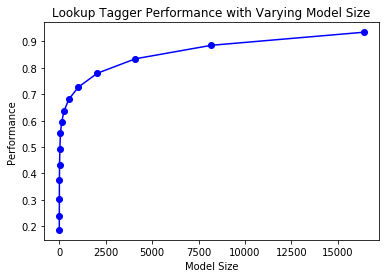

In [138]:
display()

Observe that performance initially increases rapidly as the model size grows, eventually reaching a plateau, when large increases in model size yield little improvement in performance

### Unigram Taggers

##### Unigram Tagging

Unigram taggers are based on a simple statistical algorithm: for each token, assign the tag that is most likely for that particular token. For example, it will assign the tag JJ to any occurrence of the word frequent, since frequent is used as an adjective (e.g. a frequent word) more often than it is used as a verb (e.g. I frequent this cafe). 

In [139]:
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [141]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017